## This is an example of the same insurance problem, but now using another type of model. For testing, lets use Decision Tree.

In [115]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [116]:
# Here we define where the data is
data = pd.read_csv("C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\CS_Alberto\\sklearn-umb-cs-workshop\\datasets\\insurance.csv")
print(data.head)

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [117]:
# Now lets convert categorial features into numerical features.
# For this I will use Sklearn as well
from sklearn.preprocessing import LabelEncoder

# Instance
le = LabelEncoder()

# For column 'sex'
data['sex'] = le.fit_transform(data['sex'])

# For column 'smoker'
data['smoker'] = le.fit_transform(data['smoker'])

# For column 'region'
data['region'] = le.fit_transform(data['region'])

###############
# This is just another way of doing it, instead of using pandas dataframe 'get_dummies', you can encode it directly with sklearn.
###############

In [118]:
# Select X and Y
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

# Split the data intro training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = DecisionTreeRegressor(max_depth=5, random_state=42)


In [119]:
# Now lets normalize the numerical data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the data on the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# Train the model
model.fit(X_train_scaled, y_train)

# Predict against the testing set
y_pred = model.predict(X_test_scaled)

In [121]:
# Evaluate the model  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 2919.20
Mean Squared Error (MSE): 26240611.47
Root Mean Squared Error (RMSE): 5122.56
R-squared (R2) Score: 0.83


### Next we will analyze feature importance, and with this feedback optimize the model

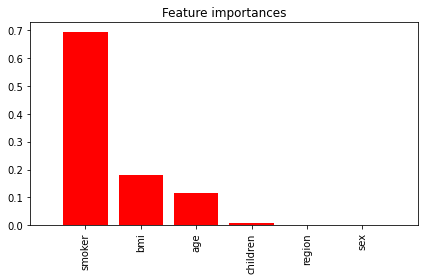

In [122]:
import matplotlib.pyplot as plt

# Lets see feature relevance
importances = model.feature_importances_
feature_names = X_train.columns.values

indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()